# Supplemental Figure 1A: MNIST AE loss plot

In [1]:
%matplotlib widget

import os, csv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

print("Matplotlib:", plt.matplotlib.__version__)


Matplotlib: 3.10.5


In [2]:
# ─────────────────────────────────────────────
# CONFIG — set to your results directory
# ─────────────────────────────────────────────
RESULTS_DIR = Path("..") / "data" / "mnist-ae"   # change if needed
LOG_CSV     = os.path.join(RESULTS_DIR, "training_log.csv")

print("LOG_CSV:", LOG_CSV)
assert os.path.exists(LOG_CSV), f"Missing file: {LOG_CSV}"


LOG_CSV: ..\data\mnist-ae\training_log.csv


In [3]:
def load_training_log(csv_path):
    epochs, loss, val_loss = [], [], []
    with open(csv_path, "r", newline="") as f:
        reader = csv.DictReader(f)
        has_val = "val_loss" in reader.fieldnames if reader.fieldnames else False
        for row in reader:
            e = row.get("epoch", None)
            if e is not None:
                try:
                    epochs.append(int(e))
                except:
                    epochs.append(len(epochs))
            else:
                epochs.append(len(epochs))
            loss.append(float(row["loss"]) if "loss" in row and row["loss"] != "" else np.nan)
            if has_val:
                v = row.get("val_loss", "")
                val_loss.append(float(v) if v != "" else np.nan)
    return np.array(epochs), np.array(loss), (np.array(val_loss) if val_loss else None)

epochs, train_loss, val_loss = load_training_log(LOG_CSV)
print(f"rows={len(epochs)}, train finite={np.isfinite(train_loss).sum()}, val finite={np.isfinite(val_loss).sum() if val_loss is not None else 0}")


rows=100, train finite=100, val finite=100


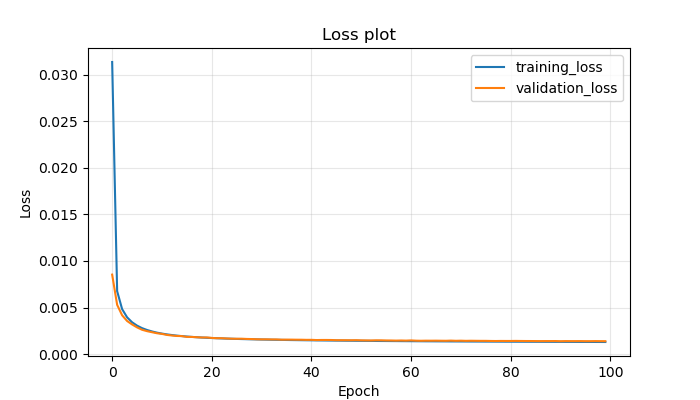

In [4]:
#| label: sfig1a_data

fig, ax = plt.subplots(figsize=(7, 4))
fig.canvas.header_visible = False

tmask = np.isfinite(train_loss)
ax.plot(epochs[tmask], train_loss[tmask], label="training_loss")

if val_loss is not None:
    vmask = np.isfinite(val_loss)
    if vmask.any():
        ax.plot(epochs[vmask], val_loss[vmask], label="validation_loss")

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Loss plot")
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()
